http://flipnwork.com/downloads/datasets/product-review-summarization-project.zip

zipped file containing the dataset and project description pdf file for the Product Review Summarization Project. First step is i need to extract json into csv i.e dictionary has to be converted to dataframe and the converted to csv format later ml and nlp techniques are applied to get insights.
http://flipnwork.com/downloads/datasets/product-review-summarization-project.zip

https://github.com/aaronbroderickpiano/Amazon-Product-Review-Dashboard

# Import Data, EDA & Text Preprocessing¶


In [4]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import matplotlib 
%matplotlib inline
import scipy
import matplotlib.pyplot as plt
import networkx as nx
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import stats
import datetime
import json 
sns.set()
%matplotlib inline

import numpy as np #Linear Algebra
import pandas as pd #Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
# % matplotlib inline

from textblob import TextBlob

#Input data files are available in the "../input/" directory.
#For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

[nltk_data] Downloading package stopwords to D:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to D:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
#To print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [6]:
# Opening JSON file 
f = open('Cell_Phones_and_Accessories.json',) 
  
# returns JSON object as  
# a dictionary 
data = json.load(f) 
    
# Closing file 
f.close() 
df1 = pd.DataFrame.from_dict(data, orient ='index')

In [7]:
df = pd.DataFrame.from_dict(data)  
# df1.to_csv('df1.csv', index = False)
df.head()

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None
2,5,True,"04 21, 2013",B008DC8N5G,None,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,None,None
3,3,True,"02 27, 2013",B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,1361923200,3,None
4,4,True,"12 19, 2013",B00AKZWGAC,None,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,None,None


In [8]:
df.head()
df.columns
len(df)

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None
2,5,True,"04 21, 2013",B008DC8N5G,None,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,None,None
3,3,True,"02 27, 2013",B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,1361923200,3,None
4,4,True,"12 19, 2013",B00AKZWGAC,None,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,None,None


Index(['Rating', 'Rev_verify', 'Review_Date', 'IC', 'Prod_meta',
       'Reviewer_Name', 'Review', 'Rev_summ', 'Review_timestamp', 'Useful',
       'Prod_img'],
      dtype='object')

760450

# Text Preprocessing



In [9]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package stopwords to D:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to D:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Spell correct using text blob for the first 1000 records
from textblob import TextBlob
dfs = df['Review'][:10].apply(lambda x: str(TextBlob(x).correct()))

In [11]:
dfs

0     Ought it for my husband. He's very happy with it
1    Great screen protector.  Doesn't even seem as ...
2    Saved me lots of money! it's not gorilla glass...
3    The material and fit is very nice, but the col...
4    His last me about 3 days till i have to charge...
5                         Love this case, very sturdy!
6    Simple and good quality shone 6 case. Its on p...
7    Great screen protector for the money! Said $1....
8    Vice charge. One problem, one if the two USB s...
9    Most battery packs for iPhones come as a total...
Name: Review, dtype: object

In [12]:
df = df.replace(to_replace='None', value=np.nan).dropna()

In [13]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(len(df)): # iterate through the list of all 9546 comments
          # remove handles (@), numbers, urls, emojis and any other special characters to have only text
            df_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',df.Review[i])
            #   df_cln = re.sub("(@[A-Za-z0-9]+)", '',df.Review[i])
            #     df_cln=df.Review[i]
              # convert all words to lower case
            df_cln = df_cln.lower()
              # split sentences into words
            df_cln = df_cln.split()
              # remove English stop words
            df_cln = [x for x in df_cln if not x in stop_words]
              # stem words to the base form
            df_cln = [ps.stem(x) for x in df_cln]
              # join words to form the original sentences
            df_cln = " ".join(df_cln)
              # append to the list to get all Comments in one place
            corpus.append(df_cln)

In [14]:
def comment_to_words(Review):
    letters_only = re.sub("[^a-zA-Z]", " ",Review) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

# TF-IDF Vectorizor

In [15]:
df['Review'] = df['Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [16]:
tokenized_comments = df['Review'].apply(lambda x: x.split()) # tokenizing

In [17]:
tokenized_comments.head()

340                         [decent, case, couple, bucks]
495     [bought, this, iPhone, fits, just, fine, with,...
991     [First, all,, package, received, looks, differ...
1215    [love, phone, looking, case, that, whole, back...
1663    [Perfect, fit., great, improvement, over, plas...
Name: Review, dtype: object

In [18]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [19]:
tokenized_comments = tokenized_comments.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [20]:
for i in range(len(tokenized_comments)):
    tokenized_comments[i] = ' '.join(tokenized_comments[i])
    
df['Review'] = tokenized_comments

In [21]:
#Transform the data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review'])
print(X)

  (0, 2934)	0.7093102449162262
  (0, 4103)	0.4546116042449052
  (0, 3212)	0.17919995135833808
  (0, 4449)	0.5080301597109431
  (1, 14031)	0.11067591402632271
  (1, 5196)	0.12715372422163893
  (1, 11140)	0.19318545773953993
  (1, 12886)	0.30429782501177
  (1, 14899)	0.17526617108427187
  (1, 14354)	0.4148799869255615
  (1, 5787)	0.16824309879727228
  (1, 10899)	0.15327791027504387
  (1, 6982)	0.20567196848529207
  (1, 1799)	0.22232821453995197
  (1, 9483)	0.31423542061186654
  (1, 14945)	0.2070675817920378
  (1, 10403)	0.07110563803187328
  (1, 7158)	0.2593065892428188
  (1, 10508)	0.3441451564409417
  (1, 9322)	0.19403667947864053
  (1, 15382)	0.10787850036413084
  (1, 5953)	0.17239156896053953
  (1, 8063)	0.09345531532089424
  (1, 5996)	0.1203204015533857
  (1, 7852)	0.12117919103565682
  :	:
  (4986, 9940)	0.15430744681184108
  (4986, 1400)	0.28592893185796514
  (4986, 3709)	0.12396592077418421
  (4986, 11345)	0.10720006001950388
  (4986, 7902)	0.33689815376879295
  (4986, 14102)	0.1

In [22]:
#Build the clusters
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [23]:
#Profile the clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i,end =' '),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind],end =' '),
    print

Top terms per cluster:
Cluster 0: 

(None,)

 charg 

(None,)

 charger 

(None,)

 thi 

(None,)

 cabl 

(None,)

 batteri 

(None,)

 power 

(None,)

 devic 

(None,)

 plug 

(None,)

 phone 

(None,)

 port 

(None,)

<function print>

Cluster 1: 

(None,)

 case 

(None,)

 thi 

(None,)

 phone 

(None,)

 protect 

(None,)

 like 

(None,)

 veri 

(None,)

 look 

(None,)

 screen 

(None,)

 feel 

(None,)

 love 

(None,)

<function print>

Cluster 2: 

(None,)

 thi 

(None,)

 phone 

(None,)

 screen 

(None,)

 band 

(None,)

 case 

(None,)

 watch 

(None,)

 veri 

(None,)

 look 

(None,)

 great 

(None,)

 like 

(None,)

<function print>

# Bag of Words

In [24]:
bagofwords=[]
for i in range (len(df)):
    words = corpus[i].split()
    bagofwords.append(words)

In [25]:
for i in range (len(df)):
    if i%1000==0:
        print(bagofwords[i],end=' ')
        print()


['decent', 'case', 'coupl', 'buck'] 
['mini', 'tripod', 'broke', 'piec', 'use'] 
['love', 'case', 'first', 'got', 'beauti', 'clean', 'show', 'iphon', 'well', 'provid', 'protect', 'howev', 'im', 'rate', 'two', 'star', 'durabl', 'even', 'though', 'look', 'great', 'frame', 'broke', 'rest', 'pocket', 'that', 'right', 'drop', 'caus', 'trauma', 'yet', 'frame', 'broke', 'design', 'flaw', 'thin', 'metal', 'near', 'vibratering', 'button'] 
['bought', 'lot', 'iphon', 'case', 'trust', 'say', 'product', 'lot', 'potenti', 'also', 'thing', 'improv', 'onth', 'shipment', 'deliveri', 'took', 'day', 'great', 'consid', 'elig', 'seller', 'prime', 'day', 'deliveri', 'featur', 'packag', 'come', 'screen', 'protector', 'manual', 'instal', 'never', 'use', 'sinc', 'alreadi', 'temper', 'glass', 'screen', 'protector', 'nice', 'add', 'onth', 'product', 'itselfth', 'vault', 'slim', 'wallet', 'case', 'feel', 'like', 'reinforc', 'hard', 'rubber', 'smooth', 'textureth', 'cut', 'camera', 'larg', 'enough', 'ensur', 'was

In [26]:
import itertools
import collections
all_words=list(itertools.chain(*bagofwords))
# print(all_words[0:9546])
# print()
print('Most commonly occuring words and frequency\n')
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

Most commonly occuring words and frequency



[('case', 13995),
 ('phone', 10143),
 ('use', 4938),
 ('charg', 4522),
 ('one', 4082),
 ('like', 4057),
 ('look', 3178),
 ('review', 3127),
 ('screen', 3063),
 ('protect', 2876),
 ('product', 2720),
 ('get', 2649),
 ('would', 2629),
 ('fit', 2375),
 ('great', 2333),
 ('well', 2276),
 ('iphon', 2246),
 ('also', 2237),
 ('work', 2164),
 ('back', 2155)]

# Word Frequency

In [27]:
freq_word_df = pd.DataFrame(words_freq.most_common(20),columns=['words','Freq'])
freq_word_df

,words,Freq
0,case,13995
1,phone,10143
2,use,4938
3,charg,4522
4,one,4082
5,like,4057
6,look,3178
7,review,3127
8,screen,3063
9,protect,2876


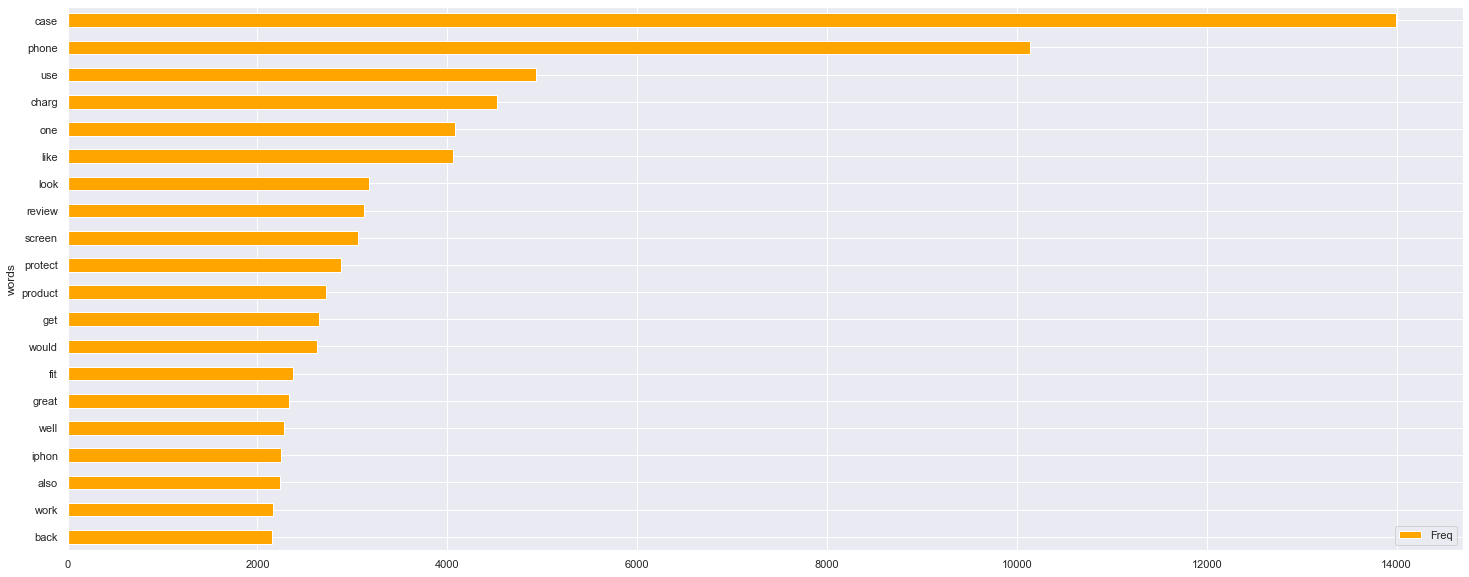

In [28]:
fig,ax=plt.subplots(figsize=(25,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='words',y='Freq',ax=ax,color='orange')
plt.show();

# Word Cloud

In [29]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
word_string=' '.join(freq_word_df.words)
wordcloud=WordCloud(#stopwords=STOPWORDS,
                       background_color='black',
                     max_words=20
                      ).generate(word_string)

<Figure size 1080x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

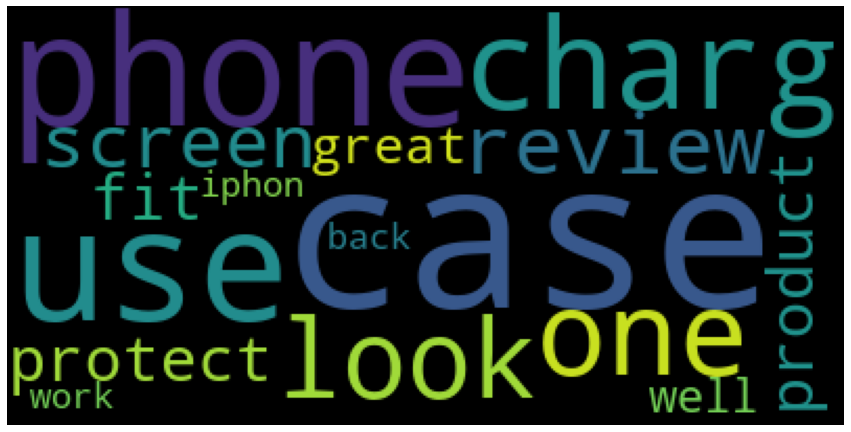

In [30]:
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Word2Vec

In [31]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to D:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to D:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from gensim.models import Word2Vec

word2vec = Word2Vec(bagofwords, min_count=2)

In [33]:
vocabulary = word2vec.wv.vocab
i=0
for key, value in vocabulary.items():
    print(key, ' : ', value) 

decent  :  Vocab(count:220, index:439, sample_int:4294967296)
case  :  Vocab(count:13995, index:0, sample_int:918988558)
coupl  :  Vocab(count:325, index:300, sample_int:4294967296)
buck  :  Vocab(count:46, index:1319, sample_int:4294967296)
bought  :  Vocab(count:658, index:134, sample_int:4294967296)
iphon  :  Vocab(count:2246, index:16, sample_int:2820399843)
fit  :  Vocab(count:2375, index:13, sample_int:2719216302)
fine  :  Vocab(count:375, index:260, sample_int:4294967296)
thin  :  Vocab(count:469, index:198, sample_int:4294967296)
may  :  Vocab(count:570, index:164, sample_int:4294967296)
even  :  Vocab(count:1352, index:45, sample_int:3962202762)
work  :  Vocab(count:2164, index:18, sample_int:2890133541)
thick  :  Vocab(count:395, index:239, sample_int:4294967296)
made  :  Vocab(count:999, index:77, sample_int:4294967296)
mount  :  Vocab(count:627, index:143, sample_int:4294967296)
use  :  Vocab(count:4938, index:2, sample_int:1709287527)
plane  :  Vocab(count:8, index:3053, s

In [34]:
v1 = word2vec.wv['phone']

In [35]:
sim_words = word2vec.wv.most_similar('phone')


In [36]:
sim_words


[('without', 0.8322731852531433),
 ('carelessli', 0.7688503265380859),
 ('ugliest', 0.7618431448936462),
 ('cubicl', 0.758715033531189),
 ('conjunct', 0.7540633678436279),
 ('inn', 0.7501746416091919),
 ('still', 0.7482721209526062),
 ('palm', 0.7439465522766113),
 ('accident', 0.7421518564224243),
 ('tact', 0.7406729459762573)]

# Lexicon Model

In [37]:
lex_file = open("AFINN-111.csv")

In [38]:
word_list = []
print(word_list)
for  record in df:
    print("record")
    print(record)
    print("tokens")
    tokens = record.split()
    print(tokens)
    words = []
    for word in tokens:
        words.append(word.lower())
        print(words)
    
    word_list.append(words)
print("word_list")
print(word_list)

[]
record
Rating
tokens
['Rating']
['rating']
record
Rev_verify
tokens
['Rev_verify']
['rev_verify']
record
Review_Date
tokens
['Review_Date']
['review_date']
record
IC
tokens
['IC']
['ic']
record
Prod_meta
tokens
['Prod_meta']
['prod_meta']
record
Reviewer_Name
tokens
['Reviewer_Name']
['reviewer_name']
record
Review
tokens
['Review']
['review']
record
Rev_summ
tokens
['Rev_summ']
['rev_summ']
record
Review_timestamp
tokens
['Review_timestamp']
['review_timestamp']
record
Useful
tokens
['Useful']
['useful']
record
Prod_img
tokens
['Prod_img']
['prod_img']
word_list
[['rating'], ['rev_verify'], ['review_date'], ['ic'], ['prod_meta'], ['reviewer_name'], ['review'], ['rev_summ'], ['review_timestamp'], ['useful'], ['prod_img']]


In [39]:
#Strip the records and create a word list for each review
word_list = []
for record in (corpus):# for record in (comments):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
#word_list 

In [40]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
print(lexicons)
#lexicons["abandon"]

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [41]:
strength = []
for Comments in word_list:
    score = 0
    for word in Comments:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)

In [42]:
senti_matrix = pd.DataFrame(strength, df.Review)

In [43]:
senti_matrix[0:10]

,0
Review,
decent case coupl buck,0
bought thi iphon fit just fine with thin case even work with thick case. made mount plane hold phone view navig app. haven't problem with fall even turbulence. hold veri snugly. veri quick easi take which time.,1
"first all, packag receiv look differ than screen protector look nice fit good won't stick bottom side pictures) also doesn't have glue edg therefor that'll futur dust/ lint trap.",6
"love phone look case that whole back appl pictur back phone. thi case part inner rubber phone cover, harder outer cover back front clip cover with velveti insid protect front glass phone. case still compact veri well made. thi review 100% unbias opinion. #sponsored.",4
perfect fit. great improv over plastic screen protector that come with phone. plu they give price,7
"let' face it..... love gadgets. rather iphones, gopros, cameras, find ourselv need that extra boost power keep do thing that love doing. gadget freak. love carri iphon gopro hero4 black, other gadget around. alway look minim daili gadget carry. usual carri either mycharge, anker 20100, marwar batteri pack with marwar onli hold 2800mah power, mycharg hold 3000mah, anker 20100 whop 20100. befor provid anker powercor slim 5000 portabl charger review, been look someth that would small lightweight marwar charger have. come anker powercor slim 5000. onli doe meet need extra boost power also pleasur carri around. sure, could carri anker 20100 with like abl slip pocket without ad weight. therefore, tend grab mycharg marwar batteri when head door with iphon gopro. i'v found that even with 3000mah capac mycharge, gopro with bacpac need more thirst quench power. like carri gopro hero4 black with bacpac have carri extra gopro batteries. therefore, it' more conveni carri extra batteri pack case also need charg iphone. anker powercor slim exactli what want batteri pack. it' slim, super lightweight, easi carry. just includ microfib pouch with microusb charger, mini charg cabl gopro, lightn adapt readi love that batteri weigh next nothing. fact that your iphon while it' charg nice feature. heck, could even slip both batteri pack iphon into your back pocket without much bulk. when iphon plug into slim 5000, phone automat start charging. continu charg even after iphon fulli charged. guess could that top off. understand thi could nice featur when charg iphone, just charg 100%, unplug from power sourc done. fact that slim 5000 featur voltageboost nice. like be abl plug devic know it' charg it' optim level safe do coupl test slim 5000. first, fulli charg batteri pack 100%.... until indic shut itself. meanwhile, iphon batteri down found that took approxim hour iphon batteri 100%. then plug slim 5000 into ipad mini drain it' battery. after batteri slim 5000 fulli drained, charg 100% again. took littl over hour reach 100%. pro slim mere 2.5"" super lightweight 4.2oz! nice matt finish grip featur voltageboost technolog which help batteri determin much power need optim charg your devic protect includ microfib pouch microusb charg cabl ..... which also use charg your microusb devic batteri pack batteri level indic light reddot award 2016 when slim 5000 fulli charged, light indic goe con batteri level indic would rather have (25%, 50%, 75%, 100%) instead (33%, 66%, 100%) will continu charg while plug into your devic would love auto shutoff when devic fulli charg could save rest power later overall, love thi slim 5000. it' perfect throw your back pocket, purse, backpack, those time that need littl more power your gadgets. just keep mind that isn't go charg your ipad full power charg your iphon dozen times. onli 5000mah. will charg your iphon least times, enough until home. be abl have 5000mah your pocket, backpack, etc. great. think it' happi medium.... skimpi power huge weight extrem power (marwar mycharg anker 20100). realli love design, simpl powerful. kind wonder anker didn't make batteri pack longer match size iphon then again, mayb it' becaus they didn't want c

# Polarity by TextBlob

In [44]:
sentiment_text = [TextBlob(Comments) for Comments in corpus]
print(sentiment_text[10].polarity)
print(sentiment_text[10])

0.24583333333333335
fortun receiv product discount free exchang honest unbias opinion alway test product write review write see feel whether posit neg honest opinioni receiv case sunday realli like qualiti nice smooth finish case prone drop case often drop morn iphon stay holder protect wallet case pop open inn past like fit snug iphon magnet bulki hard open select brown like wasnt drab brown pictur post well see three spot id credit card handi make case bulki use id card case realli like qualiti stitch case well would definit purchas case husband


In [45]:
sentiments = [[Comments.sentiment.polarity, str(Comments)] for Comments in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=["Polarity","User Comments"])
sentiment_df.sort_values(by='Polarity',ascending=False) 

,Polarity,User Comments
3053,1.000000,best case ever suck upgrad phone found case pa...
4213,1.000000,dont bother bought best buy glass go way edg d...
422,1.000000,best case ever two year dust water drop oli ga...
731,1.000000,like differ appl bandth color os perfect
1426,1.000000,realli excel couldnt happi alway shop seller best
...,...,...
3066,-0.566667,bewar order item receiv differ pack pictur web...
3135,-0.600000,miss protect front cover seal either receiv ba...
4573,-0.600000,aw pattern design mark iphon realli bad notic ...
4765,-0.800000,glass protector crap edg dont stick crap crap ...


array([<AxesSubplot:title={'center':'Polarity'}>], dtype=object)

Text(0.5, 1.0, 'Sentiments Distribution on Reviews of Products')

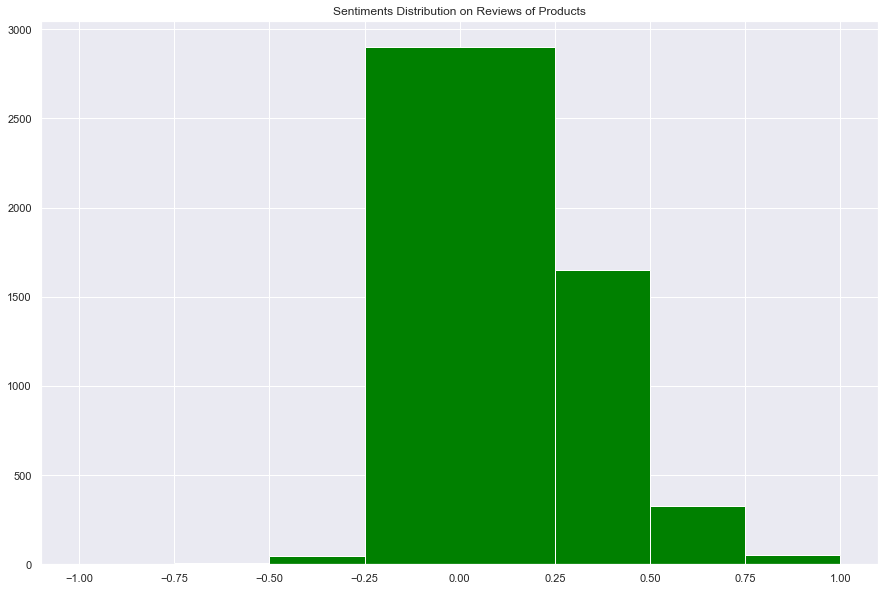

In [46]:
fig, ax = plt.subplots(figsize=(15,10))

#Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1], ax=ax, color="green")
plt.title("Sentiments Distribution on Reviews of Products")
plt.show()

# Category from Polarity

In [47]:
sentiment_df.groupby('Polarity').size()

Polarity
-1.000000     1
-0.800000     1
-0.600000     1
-0.600000     1
-0.566667     1
             ..
 0.800000     1
 0.800000    33
 0.800000     1
 0.833333     1
 1.000000    12
Length: 3450, dtype: int64

In [48]:
bins=(-1.000000,-0.250000,0.250000,1.000000)
names=['Negative','Neutral','Positive']
sentiment_df['Polarity_type']=pd.cut(sentiment_df['Polarity'],bins,labels=names)

In [49]:
sentiment_df.groupby('Polarity_type').size()

Polarity_type
Negative      58
Neutral     2935
Positive    1994
dtype: int64

In [50]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Polarity       4988 non-null   float64 
 1   User Comments  4988 non-null   object  
 2   Polarity_type  4987 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 83.0+ KB


In [51]:
sentiment_df.columns

Index(['Polarity', 'User Comments', 'Polarity_type'], dtype='object')

In [52]:
sentiment_df.columns = ['Polarity', 'UserComments', 'Polarity_type']

In [53]:
dfp = pd.DataFrame(data=sentiment_df,
                    columns=['Polarity', 'UserComments', 'Polarity_type'])
dfp

,Polarity,UserComments,Polarity_type
0,0.166667,decent case coupl buck,Neutral
1,0.090000,bought iphon fit fine thin case may even work ...,Neutral
2,0.487500,first packag receiv look differ one ad screen ...,Positive
3,0.092045,love phone look new case whole back see appl p...,Neutral
4,0.733333,perfect fit great improv plastic screen protec...,Positive
...,...,...,...
4983,0.300000,batteri amaz gone almost whole week without ch...,Positive
4984,-0.029825,phone almost year realli feel need updat revie...,Neutral
4985,0.271667,love case ive own case iphon ive past case add...,Positive
4986,0.057143,order gf keep phone protect like pink howev is...,Neutral


# Identify & Treat NaN

In [54]:
pandas.isnull(dfp)

,Polarity,UserComments,Polarity_type
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
4983,False,False,False
4984,False,False,False
4985,False,False,False
4986,False,False,False


In [55]:
# importing pandas package
import pandas as pd

# making data frame from excel file
#dataN = pd.read_excel("export_User_Comments_Polarity_Category.xlsx")

# creating bool series True for NaN values
#dataN_series = pd.isnull(dataN["Polarity_type"])
dataN_series = pd.isnull(dfp["Polarity_type"])

# filtering data
# displayind data only with team = NaN
#dataN[dataN_series]
dfp[dataN_series]

,Polarity,UserComments,Polarity_type
736,-1.0,crack within week use qmadix custom servic dep...,NaN


In [56]:
dfp["Polarity_type"]

0        Neutral
1        Neutral
2       Positive
3        Neutral
4       Positive
          ...   
4983    Positive
4984     Neutral
4985    Positive
4986     Neutral
4987    Positive
Name: Polarity_type, Length: 4988, dtype: category
Categories (3, object): ['Negative' < 'Neutral' < 'Positive']

In [57]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Polarity       4988 non-null   float64 
 1   UserComments   4988 non-null   object  
 2   Polarity_type  4987 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 83.0+ KB


In [58]:
# replacing na values in college with No college 
#dataN2["Polarity_type"].fillna("Negative", inplace = True) 
dfp["Polarity_type"].fillna("Negative", inplace = True)

In [59]:
type(dfp)
dfp.shape
dfp.head()

pandas.core.frame.DataFrame

(4988, 3)

,Polarity,UserComments,Polarity_type
0,0.166667,decent case coupl buck,Neutral
1,0.090000,bought iphon fit fine thin case may even work ...,Neutral
2,0.487500,first packag receiv look differ one ad screen ...,Positive
3,0.092045,love phone look new case whole back see appl p...,Neutral
4,0.733333,perfect fit great improv plastic screen protec...,Positive


In [61]:
# dfp.dropna()
# dfp["clean_comment"].fillna(1, inplace=True)
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Polarity       4988 non-null   float64 
 1   UserComments   4988 non-null   object  
 2   Polarity_type  4988 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 83.0+ KB


In [62]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Polarity       4988 non-null   float64 
 1   UserComments   4988 non-null   object  
 2   Polarity_type  4988 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 83.0+ KB


In [63]:
from pandas import ExcelWriter
writer = ExcelWriter('export_User_Comments_Polarity_Category.xlsx')
dfp.to_excel(writer,'Sheet1',index=False)
writer.save()

# EDA of Catarorized Data

In [64]:
dfc = pd.read_excel('export_User_Comments_Polarity_Category.xlsx')

In [65]:
dfc.columns
dfc.info()
dfc.shape

Index(['Polarity', 'UserComments', 'Polarity_type'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       4988 non-null   float64
 1   UserComments   4988 non-null   object 
 2   Polarity_type  4988 non-null   object 
dtypes: float64(1), object(2)
memory usage: 117.0+ KB


(4988, 3)

In [66]:
dfc.head()

,Polarity,UserComments,Polarity_type
0,0.166667,decent case coupl buck,Neutral
1,0.090000,bought iphon fit fine thin case may even work ...,Neutral
2,0.487500,first packag receiv look differ one ad screen ...,Positive
3,0.092045,love phone look new case whole back see appl p...,Neutral
4,0.733333,perfect fit great improv plastic screen protec...,Positive


In [67]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


<AxesSubplot:ylabel='Polarity_type'>

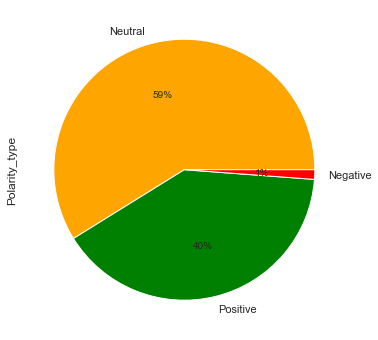

In [68]:
dfc.Polarity_type.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["orange","green","red"])

<AxesSubplot:>

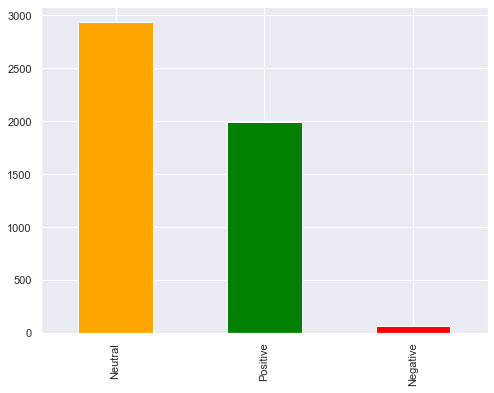

In [69]:
dfc.Polarity_type.value_counts().plot(kind='bar',  color=["orange","green","red"])

# TF-IDF

Vectorizing Dataset using TF-IDF



In [70]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(corpus).toarray()

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, dfc.Polarity_type, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3990, 2500)
(998, 2500)
(3990,)
(998,)


# Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

Making Predictions and Evaluating the Model

In [73]:
predictions = text_classifier.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[  0   5   0]
 [  0 544  52]
 [  0 141 256]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.79      0.91      0.85       596
    Positive       0.83      0.64      0.73       397

    accuracy                           0.80       998
   macro avg       0.54      0.52      0.52       998
weighted avg       0.80      0.80      0.79       998

0.8016032064128257


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
def clean_comment_length(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words) )

In [76]:
def comment_to_words(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [77]:
dfp['clean_comment']=dfp['UserComments'].apply(lambda x: comment_to_words(x))
dfp['comment_length']=dfp['UserComments'].apply(lambda x: clean_comment_length(x))
train,test = train_test_split(dfp,test_size=0.25,random_state=42)

In [78]:
train_clean_comment=[]
for comment in train['clean_comment']:
    train_clean_comment.append(comment)
test_clean_comment=[]
for comment in test['clean_comment']:
    test_clean_comment.append(comment)

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_comment)
test_features=v.transform(test_clean_comment)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [81]:
#Classifiers
Classifiers = [
    SVC(kernel="rbf", C=0.03, gamma = 'scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(),GaussianNB()]

Accuracy of SVC is 0.5613472333600642
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       1.00      0.56      0.72      1247
    Positive       0.00      0.00      0.00         0

    accuracy                           0.56      1247
   macro avg       0.33      0.19      0.24      1247
weighted avg       1.00      0.56      0.72      1247



d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 576x432 with 0 Axes>

d:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:76: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x1fe16f24a08>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x1fe16e68cc8>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

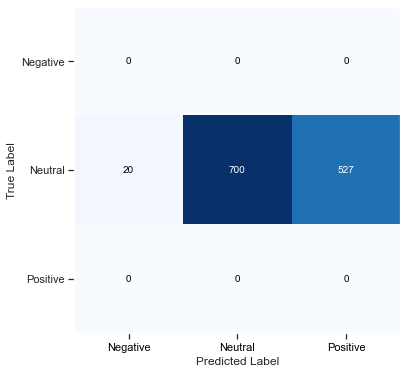

Accuracy of DecisionTreeClassifier is 0.6519647153167603
              precision    recall  f1-score   support

    Negative       0.10      0.15      0.12        13
     Neutral       0.72      0.68      0.70       735
    Positive       0.59      0.62      0.60       499

    accuracy                           0.65      1247
   macro avg       0.47      0.49      0.47      1247
weighted avg       0.66      0.65      0.65      1247



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x1fe16772088>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x1fe16ca06c8>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

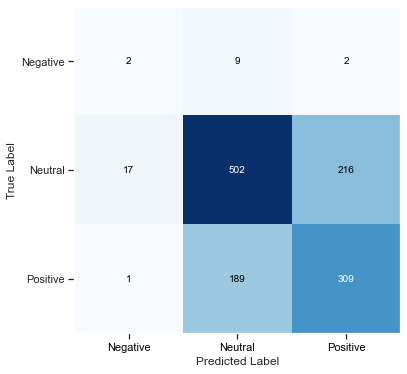

Accuracy of RandomForestClassifier is 0.7409783480352847
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       0.95      0.70      0.80       948
    Positive       0.50      0.87      0.63       299

    accuracy                           0.74      1247
   macro avg       0.48      0.52      0.48      1247
weighted avg       0.84      0.74      0.76      1247



d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 576x432 with 0 Axes>

d:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:76: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x1fe16e05e88>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x1fe16e7aa08>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

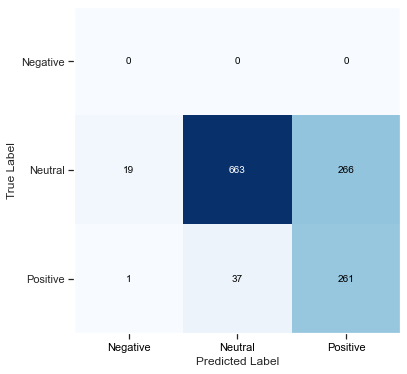

Accuracy of GradientBoostingClassifier is 0.813953488372093
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.91      0.79      0.85       812
    Positive       0.71      0.87      0.78       431

    accuracy                           0.81      1247
   macro avg       0.54      0.55      0.54      1247
weighted avg       0.84      0.81      0.82      1247



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x1fe16e59a48>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x1fe16e09fc8>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

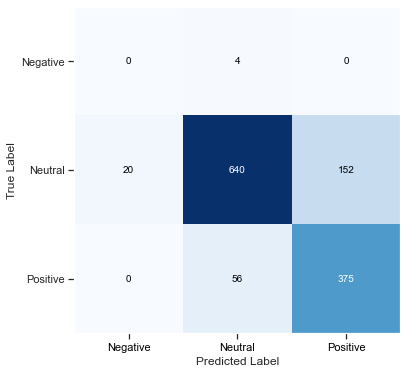

Accuracy of GaussianNB is 0.5846030473135525
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.60      0.65      0.62       640
    Positive       0.59      0.51      0.55       606

    accuracy                           0.58      1247
   macro avg       0.40      0.39      0.39      1247
weighted avg       0.59      0.58      0.59      1247



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x1fe16e830c8>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x1fe16f2b748>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

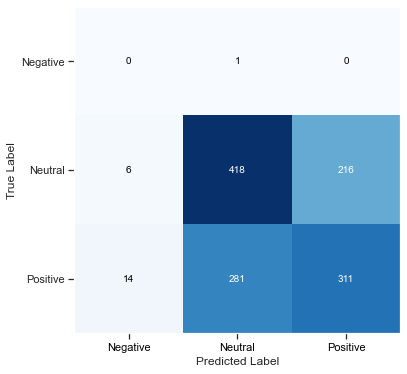

In [82]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for clf in Classifiers:
    try:
        fit = clf.fit(train_features,train['Polarity_type'])
        pred = fit.predict(test_features)
    except Exception:
        fit = clf.fit(dense_features,train['Polarity_type'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['Polarity_type'])
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)) 
    print(classification_report(pred,test['Polarity_type']))
    
    #Confusion Matrix
    cm = confusion_matrix(pred,test['Polarity_type'])
    plt.figure()
    plot_confusion_matrix(cm,cmap=plt.cm.Blues)
    plt.xticks(range(3), ['Negative','Neutral','Positive'],color='black')
    plt.yticks(range(3), ['Negative','Neutral','Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Multinomial Naive Bayes model

In [83]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [84]:
%time nb.fit(X_train, y_train)

Wall time: 35 ms


MultinomialNB()

In [85]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test)

In [86]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.7344689378757515

In [87]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[  0,   5,   0],
       [  0, 555,  41],
       [  0, 219, 178]], dtype=int64)

# Topic Modeling

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(dfc['UserComments'].values.astype('U'))

In [89]:
#Now let's look at our document term matrix:
doc_term_matrix

<4988x7363 sparse matrix of type '<class 'numpy.int64'>'
	with 282929 stored elements in Compressed Sparse Row format>

# Latent Dirichlet Allocation (LDA)

In [90]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [91]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

licens
oni
muchi
crispi
win
review
knob
armornbspa
pri
problemth


In [92]:
# Let's find 10 words with the highest probability for the first topic. To get the first topic, 
# you can use the components_ attribute and pass a 0 index as the value:
first_topic = LDA.components_[0]
print(first_topic)

[20.18433115  8.19802899  2.1759677  ...  0.20036377  0.20608635
  0.20070955]


In [93]:
top_topic_words = first_topic.argsort()[-10:]
print(top_topic_words)

[4790 4600 6886 4822 1679 6893  501  828 1052 1046]


In [94]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

port
phone
usb
power
devic
use
batteri
cabl
charger
charg


In [95]:
#Let's print the 10 words with highest probabilities for all the five topics:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['port', 'phone', 'usb', 'power', 'devic', 'use', 'batteri', 'cabl', 'charger', 'charg']


Top 10 words for topic #1:
['small', 'qualiti', 'product', 'arm', 'armband', 'len', 'appl', 'fit', 'watch', 'band']


Top 10 words for topic #2:
['hold', 'great', 'look', 'fit', 'wallet', 'like', 'use', 'card', 'phone', 'case']


Top 10 words for topic #3:
['camera', 'good', 'screen', 'time', 'app', 'like', 'mount', 'work', 'use', 'phone']


Top 10 words for topic #4:
['fit', 'feel', 'protector', 'review', 'look', 'like', 'protect', 'screen', 'phone', 'case']




In [96]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(4988, 5)

In [97]:
dfc['Topic'] = topic_values.argmax(axis=1)

In [98]:
dfc.head(10)

,Polarity,UserComments,Polarity_type,Topic
0,0.166667,decent case coupl buck,Neutral,2
1,0.090000,bought iphon fit fine thin case may even work ...,Neutral,3
2,0.487500,first packag receiv look differ one ad screen ...,Positive,4
3,0.092045,love phone look new case whole back see appl p...,Neutral,4
4,0.733333,perfect fit great improv plastic screen protec...,Positive,4
5,0.286424,let face love gadget rather iphon gopro camera...,Positive,0
6,0.128684,prefer visual everyon els read oni need better...,Neutral,0
7,0.500000,bit bulkier thought would love feel case,Positive,4
8,0.072064,avid appl product fan year year year liter own...,Neutral,0
9,0.185429,ok rare review review normal reserv product re...,Neutral,0


# Non-Negative Matrix Factorization (NMF)

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = tfidf_vect.fit_transform(dfc['UserComments'].values.astype('U'))

In [100]:
# Once the document term matrix is generated, we can create a probability matrix that contains probabilities of all the words
# in the vocabulary for all the topics. To do so, we can use the NMF class from the sklearn.decomposition module. 
# Look at the following script:

from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=5, random_state=42)

In [101]:
#As we did in the previous section, let's randomly get 10 words from our vocabulary:
import random

for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])

technologypro
mobil
problem
hover
ask
ol
daylight
shortcom
buzz
mh


In [102]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=5, random_state=42)

In [103]:
import random

for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])

panelit
batman
paint
handsom
total
infin
securelyth
userfriendli
adequ
clean


In [104]:
first_topics = nmf.components_[0]
top_topic_words = first_topics.argsort()[-10:]

In [105]:
for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

fit
color
love
feel
button
like
look
protect
phone
case


In [106]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['fit', 'color', 'love', 'feel', 'button', 'like', 'look', 'protect', 'phone', 'case']


Top 10 words for topic #1:
['plug', 'use', 'port', 'devic', 'usb', 'power', 'cabl', 'batteri', 'charger', 'charg']


Top 10 words for topic #2:
['leather', 'like', 'great', 'color', 'fit', 'wrist', 'look', 'appl', 'watch', 'band']


Top 10 words for topic #3:
['bubbl', 'phone', 'protect', 'cover', 'instal', 'edg', 'temper', 'glass', 'protector', 'screen']


Top 10 words for topic #4:
['slot', 'work', 'mount', 'hold', 'review', 'wallet', 'use', 'product', 'card', 'phone']




In [107]:
topic_values = nmf.transform(doc_term_matrix)
dfc['Topics'] = topic_values.argmax(axis=1)
dfc.head(5)

,Polarity,UserComments,Polarity_type,Topic,Topics
0,0.166667,decent case coupl buck,Neutral,2,0
1,0.090000,bought iphon fit fine thin case may even work ...,Neutral,3,4
2,0.487500,first packag receiv look differ one ad screen ...,Positive,4,3
3,0.092045,love phone look new case whole back see appl p...,Neutral,4,0
4,0.733333,perfect fit great improv plastic screen protec...,Positive,4,3


# Prediction Models

In [108]:
dfp = pd.read_excel('export_User_Comments_Polarity_Category.xlsx')

In [109]:
dfp.head()

,Polarity,UserComments,Polarity_type
0,0.166667,decent case coupl buck,Neutral
1,0.090000,bought iphon fit fine thin case may even work ...,Neutral
2,0.487500,first packag receiv look differ one ad screen ...,Positive
3,0.092045,love phone look new case whole back see appl p...,Neutral
4,0.733333,perfect fit great improv plastic screen protec...,Positive


In [110]:
#Check for NaN values in each column
dfp.isna().sum()
#Percentage of NaN values
((len(dfp)-dfp.count())/len(dfp))*100

Polarity         0
UserComments     0
Polarity_type    0
dtype: int64

Polarity         0.0
UserComments     0.0
Polarity_type    0.0
dtype: float64

In [111]:
#dfp.UserComments = dfp.UserComments.astype(str)
#dfp['UserComments'] = dfp['UserComments'].astype('|S')
dfp['UserComments'] = dfp['UserComments'].astype(str)

In [112]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       4988 non-null   float64
 1   UserComments   4988 non-null   object 
 2   Polarity_type  4988 non-null   object 
dtypes: float64(1), object(2)
memory usage: 117.0+ KB


# Comparison of Model Accuracies

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  


<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x1fe16e81808>,
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'DecisionTreeClassifier'),
  Text(2, 0, 'RandomForestClassifier'),
  Text(3, 0, 'GradientBoostingClassifier'),
  Text(4, 0, 'GaussianNB')])

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Model')

Text(0.5, 1.0, 'Classifier Accuracies')

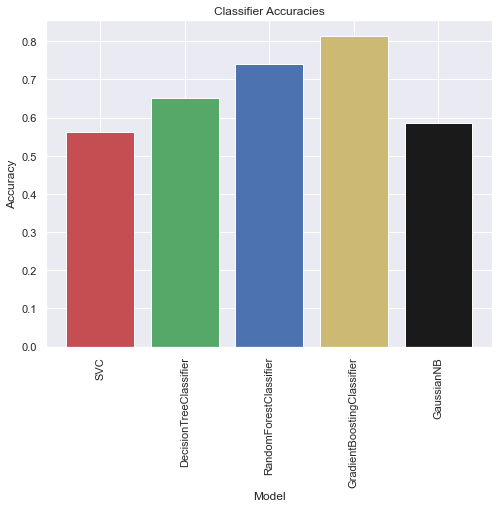

In [113]:
index=list(range(len(Classifiers)))
plt.bar(index,Accuracy,color='rgbyk')
plt.xticks(index,Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')